In [1]:
import customize_motif_vector
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
reload(__init__)
reload(extract_motif)
reload(customize_motif_vector)
reload(motif_class)
reload(glycan_profile)
import plot_glycan_utilities
reload(plot_glycan_utilities)
import matplotlib.pyplot as plt
from glypy.io import glycoct

%matplotlib inline


# motif abundance table each column belongs to one glycan profile

In [2]:
abundance_data_table = json_utility.load_json(__init__.json_address + "NBT_dict_name_abundance_cross_profile.json")
merged_glycan_profile, _ = glycan_profile.load_glycan_profile_dic()
glycan_profiles_obj = glycan_profile.combine_profile_mz_with_motif_existance(merged_glycan_profile,
                                                                                  abundance_data_table)
motif_abd_table = glycan_profiles_obj.table_against_wt_relative_abd()
motif_abd_table.head()


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
1,0.983567,0.971326,0.922160,0.968353,0.973432,0.346590,0.984724,1.00000,1.000000,0.456087,...,1.0,0.476253,0.980933,1.0,1.0,0.0,0.208566,0.934294,0.053442,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.405467,1.000000,1.00000,1.000000,0.572179,...,1.0,0.476253,1.000000,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
4,0.992653,1.000000,0.993703,1.000000,1.000000,0.961190,0.998558,0.99672,0.994765,0.833880,...,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.980397


# build dependent tree

In [3]:
import numpy as np
_np_mat = np.array(motif_abd_table)
weight_dict = {}
for i in range(len(_np_mat)):
        weight_dict[i] = list(_np_mat[i])

vec_dict = json_utility.load_json(__init__.json_address + 'NBT_motif_dic_degree_list.json')
motif_ = motif_class.GlycanMotifLib(vec_dict)
dp_tree = motif_class.MotifDpTree(motif_, weight_dict)


<class 'str'>
start motif_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
Finish the n-glycan match  716  motifs are matched to the n-glycan core
start building ncore_dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [18]:
str_vec = [str(i) for i in motif_.motif_vec]

(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=1.83697019872e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c681160>)

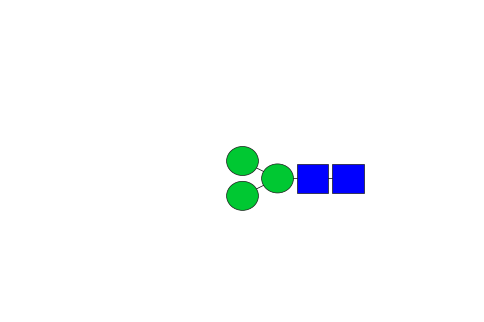

In [23]:
json_utility.store_json(__init__.json_address + r"motif_vector.json", str_vec)
aa = glycoct.loads("RES\n1b:x-dglc-HEX-1:5\n2s:n-acetyl\n3b:b-dglc-HEX-1:5\n4s:n-acetyl\n5b:b-dman-HEX-1:5\n6b:a-dman-HEX-1:5\n7b:a-dman-HEX-1:5\nLIN\n1:1d(2+1)2n\n2:1o(4+1)3d\n3:3d(2+1)4n\n4:3o(4+1)5d\n5:5o(3+1)6d\n6:5o(6+1)7d\n")
plot_glycan_utilities.plot_glycan(aa)

# store the generated table

In [15]:
df_ncore = motif_abd_table[motif_abd_table.index.isin(dp_tree.all_nodes)]
df_ncore.to_csv(__init__.json_address + r"nglycan_core_profile_table.txt")
df_ncore.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
51,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
77,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0
84,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.000000,1.0,1.0,1.0,0.481719,1.0,1.0,1.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.948263,0.0,0.0,0.0,0.0
104,1.0,1.0,1.0,1.0,1.0,0.405467,1.0,1.0,1.0,0.572179,...,1.0,0.476253,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0


In [14]:
df_ncore = motif_abd_table[motif_abd_table.index.isin(dp_tree.drop_node())]
df_ncore.to_csv(__init__.json_address + r"nglycan_core_profile_table_nodes_dropped.txt")
df_ncore.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
51,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
77,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
84,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.481719,1.000000,1.000000,1.000000,0.000000
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.948263,0.000000,0.000000,0.000000,0.000000
104,1.000000,1.000000,1.000000,1.000000,1.000000,0.405467,1.000000,1.000000,1.000000,0.572179,...,1.000000,0.476253,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
114,0.893496,0.846768,0.974741,0.667837,0.000000,0.796397,0.819620,0.878569,0.935537,0.871198,...,1.000000,1.000000,0.876427,0.908821,0.939975,0.000000,0.263512,0.000000,0.000000,0.918881
115,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
149,0.983567,0.971326,0.922160,0.968353,0.973432,0.346590,0.984724,1.000000,1.000000,0.456087,...,1.000000,0.476253,0.980933,1.000000,1.000000,0.000000,0.208566,0.889126,0.000000,1.000000
150,0.893496,0.846768,0.974741,0.667837,0.000000,0.405467,0.819620,0.878569,0.935537,0.572179,...,1.000000,0.476253,0.876427,0.908821,0.939975,0.000000,0.263512,0.000000,0.000000,0.918881


# draw represnetative

(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=5.51091059616e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x151601940>)

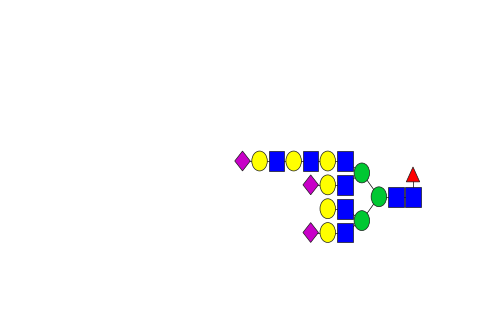

In [16]:
_list = dp_tree.drop_node()
# plot_glycan_utilities.plot_glycan_list([motif_.motif_vec[i] for i in _list])
plot_glycan_utilities.plot_glycan(motif_.motif_vec[-1])



In [52]:
# test
# from glypy.structure.glycan import glycan
from glypy.structure.glycan import MAIN_BRANCH_SYM
from glypy.structure.monosaccharide import *
from glypy.structure.constants import Stem
import numpy as np
a_glycan = motif_.motif_vec[-1]
# nodes = list(a_sugar.depth_first_traversal())
# for i in nodes:
nodes =  [i for i in a_glycan.depth_first_traversal()]
ndepth = np.array([i for i in a_glycan.depth_first_traversal(apply_fn=depth)])
relatives1 =  np.array([i for i in a_glycan.depth_first_traversal(apply_fn)])
# relatives2 =  np.array([i for i in a_glycan.depth_first_traversal(apply_fn=children)])
# test_ = relatives1[0]
# test_
ndepth

array([11,  1, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  3,  2,  1,  4,  2,
        1,  3,  2,  1])

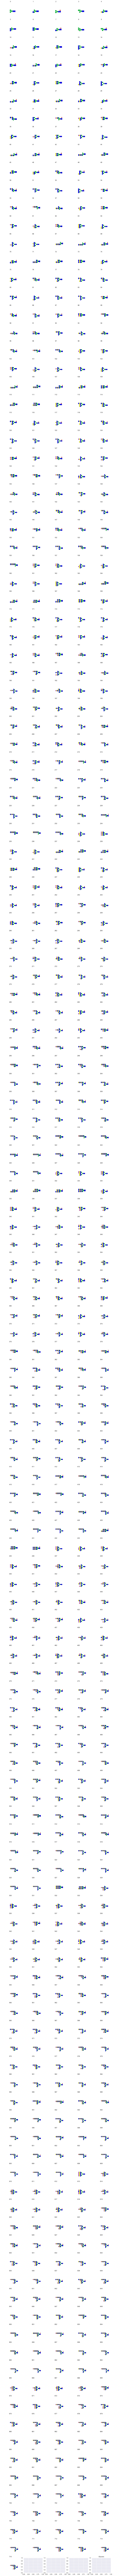

In [14]:
_list = dp_tree.all_nodes
plot_glycan_utilities.plot_glycan_list([motif_.motif_vec[i] for i in _list])

# motif and dp tree and edge list

In [50]:
motif_lib = motif_class.GlycanMotifLib(json_utility.load_json(__init__.output_motif_dic_degree_list_addr)) # unicarbkb_motifs_12259.json
print("len of motif vec", len(motif_lib.motif_vec))
print(motif_lib.motif_vec[:10])


<class 'str'>
start motif_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
Finish the n-glycan match  716  motifs are matched to the n-glycan core
len of motif vec 1695
[RES
1b:x-dglc-HEX-1:5
2s:n-acetyl
LIN
1:1d(2+1)2n
, RES
1b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
2s:n-acetyl
LIN
1:1d(5+1)2n
, RES
1b:b-dgal-HEX-1:5
LIN
, RES
1b:b-dman-HEX-1:5
LIN
, RES
1b:a-dman-HEX-1:5
LIN
, RES
1b:a-lgal-HEX-1:5|6:d
LIN
, RES
1b:x-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3d(2+1)4n
, RES
1b:b-dgal-HEX-1:5
2b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
3s:n-acetyl
LIN
1:1o(3+2)2d
2:2d(5+1)3n
, RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+1)3d
, RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dman-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+1)3d
]


In [47]:
tree_type_dp, edge_list = motif_lib.motif_dependence_tree()

start building dependence_tree


In [48]:
edge_list

[(0, 6),
 (2, 7),
 (0, 8),
 (0, 9),
 (4, 10),
 (3, 11),
 (0, 12),
 (2, 13),
 (4, 14),
 (8, 15),
 (6, 16),
 (10, 17),
 (10, 18),
 (9, 19),
 (11, 20),
 (11, 21),
 (6, 22),
 (12, 22),
 (13, 23),
 (8, 24),
 (11, 25),
 (14, 26),
 (17, 27),
 (17, 28),
 (18, 28),
 (20, 29),
 (16, 30),
 (19, 31),
 (20, 32),
 (19, 33),
 (20, 34),
 (21, 34),
 (24, 35),
 (16, 36),
 (22, 36),
 (17, 37),
 (23, 38),
 (23, 39),
 (21, 40),
 (25, 40),
 (19, 41),
 (25, 42),
 (28, 43),
 (27, 44),
 (28, 44),
 (31, 45),
 (29, 46),
 (29, 47),
 (32, 47),
 (30, 48),
 (31, 49),
 (29, 50),
 (34, 50),
 (30, 51),
 (31, 52),
 (33, 52),
 (32, 53),
 (34, 53),
 (34, 54),
 (38, 55),
 (30, 56),
 (36, 56),
 (37, 57),
 (35, 58),
 (29, 59),
 (28, 60),
 (37, 60),
 (35, 61),
 (33, 62),
 (41, 62),
 (30, 63),
 (40, 64),
 (42, 64),
 (41, 65),
 (43, 66),
 (44, 66),
 (48, 67),
 (45, 68),
 (45, 69),
 (49, 69),
 (46, 70),
 (47, 70),
 (47, 71),
 (48, 72),
 (45, 73),
 (52, 73),
 (46, 74),
 (50, 74),
 (47, 75),
 (50, 75),
 (53, 75),
 (50, 76),
 (54, 

In [3]:
merged_glycan_profile

{'Gly01': {'2244': 'G04483SK',
  '2605': 'G30460NZ',
  '2967': 'G17689DH',
  '3416': 'G54338PJ',
  '3865': '3865.1',
  '4226': 'G86696LV',
  '4587': '4587.1',
  '5037': 'G49604DB',
  '5486': '5486.1'},
 'Gly02': {'2244': 'G04483SK',
  '2605': 'G30460NZ',
  '2967': 'G17689DH',
  '3416': 'G54338PJ',
  '3865': '3865.1',
  '4226': 'G86696LV',
  '4587': '4587.1',
  '5037': 'G49604DB'},
 'Gly03': {'2244': 'G04483SK',
  '2693': 'G07568IR',
  '3055': 'G88127MB',
  '3416': '3416.3',
  '3777': 'G76812VG',
  '4226': 'G56516KW',
  '4675': '4675.1'},
 'Gly04': {'2244': 'G04483SK',
  '2605': 'G30460NZ',
  '2967': 'G17689DH',
  '3416': 'G54338PJ',
  '3777': 'G76812VG',
  '4226': 'G56516KW'},
 'Gly05': {'2244': 'G04483SK',
  '2605': 'G30460NZ',
  '2967': 'G17689DH',
  '3416': '3416.1'},
 'Gly06': {'1591': 'G07483YN',
  '1836': 'G80858MF',
  '2081': 'G80393PG',
  '2326': 'G00176HZ',
  '2530': 'G79457WN',
  '2892': 'G79412GP',
  '3096': 'G40242TG',
  '3457': '3457.1',
  '3777': 'G76812VG',
  '4022': 'G8